# Combining `.csv`'s, Overall Annotations Data

In [4]:
import pandas as pd
import os
from glob import glob
from pathlib import Path

cwd = Path.cwd()
print(cwd)
annotations_dir = cwd / "Annotations"

# If current path does not end in "Annotations", move into it
if cwd.name != "Annotations":
    if annotations_dir.exists():
        os.chdir(annotations_dir)
        print(f"Changed working directory to: {annotations_dir}")
    else:
        raise FileNotFoundError(f"'Annotations' directory not found at: {annotations_dir}")
else:
    print("Already in Annotations directory.")

/home/fs1620/MLBD_2024_25/Research_Project/LiaDataAnalysis/Annotations
Already in Annotations directory.


In [6]:
# import pandas as pd
# from pathlib import Path

# # 1. Point to your Annotations folder
# base_dir = Path.cwd()

# # 2. List all CSVs in there, skip any starting with 'imputed'
# csv_paths = [
#     p for p in base_dir.glob("*.csv")
# ]

# if not csv_paths:
#     raise FileNotFoundError("No non-imputed CSVs found in Annotations/")

# # 3. Read them all into a list
# df_list = []
# for p in csv_paths:
#     df = pd.read_csv(p)
#     print(df.shape)
#     # optional: tag sample from filename
#     df["sample_id"] = p.stem
#     df_list.append(df)

# # 4. Concatenate
# combined_df = pd.concat(df_list, ignore_index=True)

# # 5. (Optional) reorder columns
# meta = ["sample_id", "ID", "Label"]
# features = [c for c in combined_df.columns if c not in meta]
# combined_df = combined_df[meta + features]

# # 6. Save the result
# combined_df.to_csv(base_dir / "combined_annotations.csv", index=False)

# print(f"Loaded {len(df_list)} CSVs, total rows = {combined_df.shape[0]}")

# Label Harmonisation

In [7]:
combined = pd.read_csv('combined_annotations.csv')
print(f'Unique labels in the combined dataset: {combined['Label'].unique()}')

Unique labels in the combined dataset: ['CIN1' 'NORMAL' 'CGIN' 'Normal' 'normal' 'CIN2' 'HPV INFECTION'
 'normal 1']


In [8]:
# Combine various normal labels into one label
combined_copy = combined.copy()
# Then apply mapping to standard labels
harmonised_map = {
    'NORMAL': 'Normal',
    'normal': 'Normal',
    'normal 1': 'Normal',
}

# Only replace known variants, leave others untouched
combined_copy['Label'] = combined_copy['Label'].replace(harmonised_map)

# Check the first few entries of the reformatted DataFrame
display(combined_copy)
print(f'Updated unique labels in the combined dataset: {combined_copy['Label'].unique()}')

,sample_id,ID,Label,50.0094401672363,50.0688464477539,50.2138850524902,50.2588908508301,50.2893893554688,50.3882090881348,50.447840435791,...,1196.19197724609,1196.94295380859,1197.12715791016,1197.53121064453,1198.50252412109,1198.84285615234,1199.32515595703,1199.60176728516,1199.99214814453,1200.48873017578
0,MK484_CSV,1,CIN1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,MK484_CSV,2,CIN1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,104.948468,104.948468,104.948468,73.945946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,MK484_CSV,3,CIN1,0.0,0.0,0.0,0.000000,0.000000,8.024724,8.024724,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,MK484_CSV,4,CIN1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,MK484_CSV,5,CIN1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,231.247212,231.247212,231.247212,228.784299,211.314571,211.314571,120.310658,120.310658,120.310658,120.310658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,MK521_CIN1,365,Normal,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,88.364899,77.529847,77.529847,52.139954,284.031469,384.534721,439.623420,227.585149,0.000000,0.000000
3061,MK521_CIN1,366,Normal,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,208.738045,182.254554,182.254554,122.701822,108.920124,0.000000,0.000000,0.000000,0.000000,0.000000
3062,MK521_CIN1,367,Normal,0.0,0.0,0.0,112.352692,112.352692,85.625695,85.625695,...,163.295664,101.884000,101.884000,238.479395,483.332377,427.165508,151.825715,37.060299,0.000000,0.000000
3063,MK521_CIN1,368,Normal,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,69.608155,78.125322,78.125322,98.083691,168.612609,166.170812,104.732642,43.696923,0.000000,0.000000


Updated unique labels in the combined dataset: ['CIN1' 'Normal' 'CGIN' 'CIN2' 'HPV INFECTION']


# Preliminary Analysis

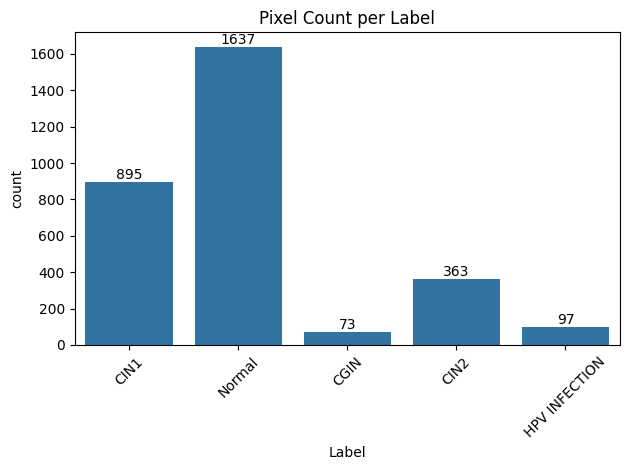

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data=combined_copy, x='Label')
ax.bar_label(ax.containers[0])
plt.title('Pixel Count per Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

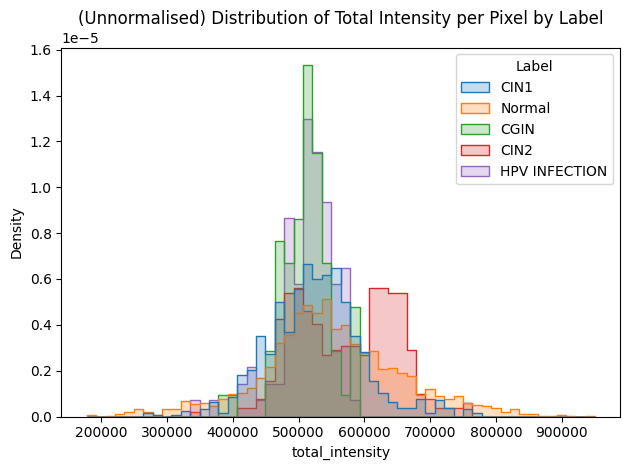

In [10]:
import numpy as np

# Drop non-feature columns
feature_cols = [col for col in combined_copy.columns if col not in ['ID', 'Label', 'sample_id', 'global_pixel_id']]

# Compute total intensity per pixel
combined_copy['total_intensity'] = combined_copy[feature_cols].sum(axis=1)

# Plot histogram of total intensity by Label
sns.histplot(data=combined_copy, x='total_intensity', hue='Label', element='step', stat='density', common_norm=False)
plt.title('(Unnormalised) Distribution of Total Intensity per Pixel by Label')
plt.tight_layout()
plt.show()

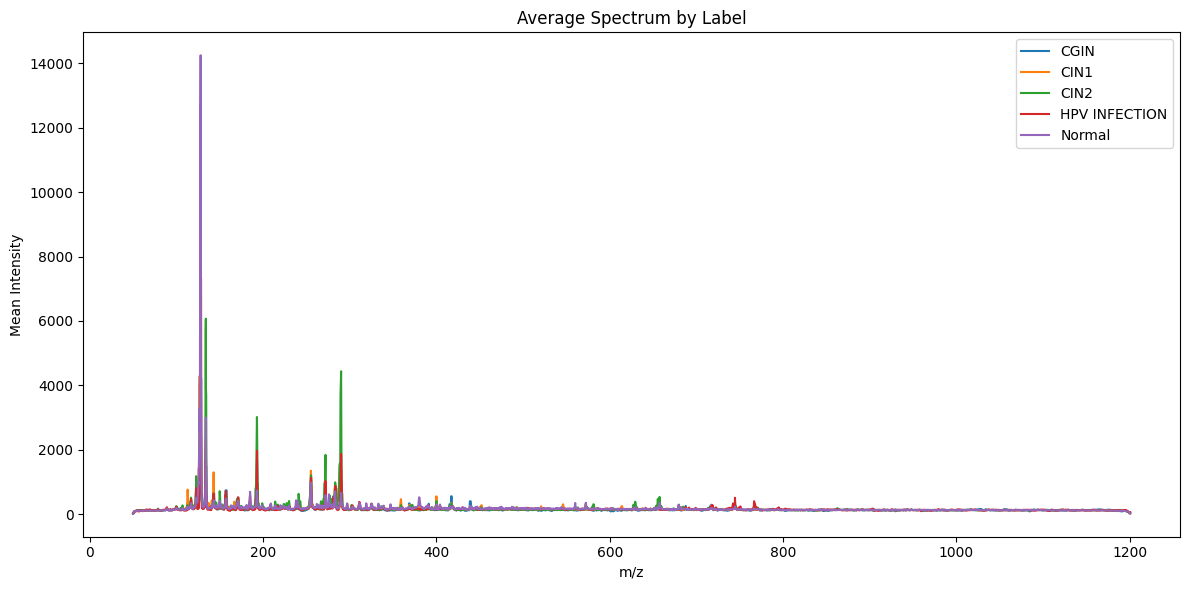

In [11]:
# Group by Label and compute mean spectrum
mean_spectra = combined_copy.groupby('Label')[feature_cols].mean().T

# Plot average spectra
plt.figure(figsize=(12, 6))
for label in mean_spectra.columns:
    plt.plot(mean_spectra.index.astype(float), mean_spectra[label], label=label)

plt.title('Average Spectrum by Label')
plt.xlabel('m/z')
plt.ylabel('Mean Intensity')
plt.legend()
# plt.xlim(600, 800)
# plt.ylim(0,1000)
plt.tight_layout()
plt.show()

# TIC Normalisation

In [12]:
import numpy as np

# Define spectral feature columns (exclude metadata)
features = [col for col in combined_copy.columns 
            if col not in ['global_pixel_id', 'ID', 'Label', 'sample_id', 'total_intensity']]

# Compute TIC per spectrum (row sum)
tic = combined_copy[features].sum(axis=1)

# Avoid division by zero (just in case)
tic = tic.replace(0, np.nan)

# Perform TIC normalization
combined_copy.loc[:, features] = combined_copy[features].div(tic, axis=0)

display(combined_copy)

,sample_id,ID,Label,50.0094401672363,50.0688464477539,50.2138850524902,50.2588908508301,50.2893893554688,50.3882090881348,50.447840435791,...,1196.94295380859,1197.12715791016,1197.53121064453,1198.50252412109,1198.84285615234,1199.32515595703,1199.60176728516,1199.99214814453,1200.48873017578,total_intensity
0,MK484_CSV,1,CIN1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550425.571294
1,MK484_CSV,2,CIN1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000203,0.000203,1.433516e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,515836.238801
2,MK484_CSV,3,CIN1,0.0,0.0,0.0,0.000000,0.000000,0.000015,0.000015,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,518125.479751
3,MK484_CSV,4,CIN1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,536273.189392
4,MK484_CSV,5,CIN1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000449,0.000449,4.444038e-04,0.000410,0.000410,0.000234,0.000234,0.000234,0.000234,514811.710411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,MK521_CIN1,365,Normal,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000149,0.000149,1.004899e-04,0.000547,0.000741,0.000847,0.000439,0.000000,0.000000,518857.900997
3061,MK521_CIN1,366,Normal,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000360,0.000360,2.423784e-04,0.000215,0.000000,0.000000,0.000000,0.000000,0.000000,506240.734005
3062,MK521_CIN1,367,Normal,0.0,0.0,0.0,0.000227,0.000227,0.000173,0.000173,...,0.000205,0.000205,4.808480e-04,0.000975,0.000861,0.000306,0.000075,0.000000,0.000000,495955.854285
3063,MK521_CIN1,368,Normal,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000148,0.000148,1.862697e-04,0.000320,0.000316,0.000199,0.000083,0.000000,0.000000,526568.135775


# Log-Median Transform

In [13]:
# Apply log transform
log_transformed = np.log1p(combined_copy[features])

# Subtract row-wise median
row_medians = log_transformed.median(axis=1)
log_med_normalized = log_transformed.subtract(row_medians, axis=0)

# Store transformed features separately if needed
combined_copy_logmed = combined_copy.copy()
combined_copy_logmed[features] = log_med_normalized

In [14]:
import os
from pathlib import Path

cwd = Path.cwd()
parent_dir = cwd.parent  # one level above current directory

save_dir = parent_dir / "PreppedData"
os.makedirs(save_dir, exist_ok=True)  # create folder if not exists

# Extract feature matrix (as numpy array)
X = combined_copy_logmed[features].values

# Define label mapping explicitly
label_mapping = {
    'Normal': 0,
    'CIN1': 1,
    'CIN2': 2,
    'CGIN': 3,
    'HPV INFECTION': 4
}

# Extract labels
y_raw = combined_copy_logmed['Label'].values

# Map string labels to integers using mapping
y_encoded = combined_copy_logmed['Label'].map(label_mapping)

# Check for unmapped labels
if y_encoded.isnull().any():
    missing = combined_copy_logmed.loc[y_encoded.isnull(), 'Label'].unique()
    raise ValueError(f"Found unmapped labels: {missing}")

# Convert to integer numpy array
y_encoded = y_encoded.astype(int).values

# Save both to a single compressed npz file inside save_dir
np.savez_compressed(save_dir / 'combined_logmed_transformed.npz', X=X, y=y_encoded)
print(f"Saved compressed data to '{save_dir / 'combined_logmed_transformed.npz'}'")

Saved compressed data to '/home/fs1620/MLBD_2024_25/Research_Project/LiaDataAnalysis/PreppedData/combined_logmed_transformed.npz'


In [15]:
display(combined_copy_logmed.head())
print(combined_copy_logmed['Label'].isna().sum())
print(np.unique_counts(y_encoded))

,sample_id,ID,Label,50.0094401672363,50.0688464477539,50.2138850524902,50.2588908508301,50.2893893554688,50.3882090881348,50.447840435791,...,1196.94295380859,1197.12715791016,1197.53121064453,1198.50252412109,1198.84285615234,1199.32515595703,1199.60176728516,1199.99214814453,1200.48873017578,total_intensity
0,MK484_CSV,1,CIN1,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,...,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-2.158875e-04,-2.158875e-04,-2.158875e-04,-2.158875e-04,550425.571294
1,MK484_CSV,2,CIN1,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,...,-0.000013,-0.000013,-0.000073,-0.000216,-0.000216,-2.160167e-04,-2.160167e-04,-2.160167e-04,-2.160167e-04,515836.238801
2,MK484_CSV,3,CIN1,-0.000235,-0.000235,-0.000235,-0.000235,-0.000235,-0.000220,-0.000220,...,-0.000235,-0.000235,-0.000235,-0.000235,-0.000235,-2.352870e-04,-2.352870e-04,-2.352870e-04,-2.352870e-04,518125.479751
3,MK484_CSV,4,CIN1,-0.000215,-0.000215,-0.000215,-0.000215,-0.000215,-0.000215,-0.000215,...,-0.000215,-0.000215,-0.000215,-0.000215,-0.000215,-2.149354e-04,-2.149354e-04,-2.149354e-04,-2.149354e-04,536273.189392
4,MK484_CSV,5,CIN1,-0.000233,-0.000233,-0.000233,-0.000233,-0.000233,-0.000233,-0.000233,...,0.000216,0.000216,0.000211,0.000177,0.000177,6.189902e-07,6.189902e-07,6.189902e-07,6.189902e-07,514811.710411


0
UniqueCountsResult(values=array([0, 1, 2, 3, 4]), counts=array([1637,  895,  363,   73,   97]))


# PCA

This should ideally be done after the data has been prepped for CV, since we want to avoid any chance of data leakage, leading to over-optimistic performance of the model. Here, we have used it for visualisation across the entire dataset.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import combinations

# Standardise the feature data
X_scaled = StandardScaler().fit_transform(combined_copy_logmed[features])
#X_scaled = combined_copy_logmed[features]
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [13]:
# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(5)])
pca_df['Label'] = combined_copy['Label'].values

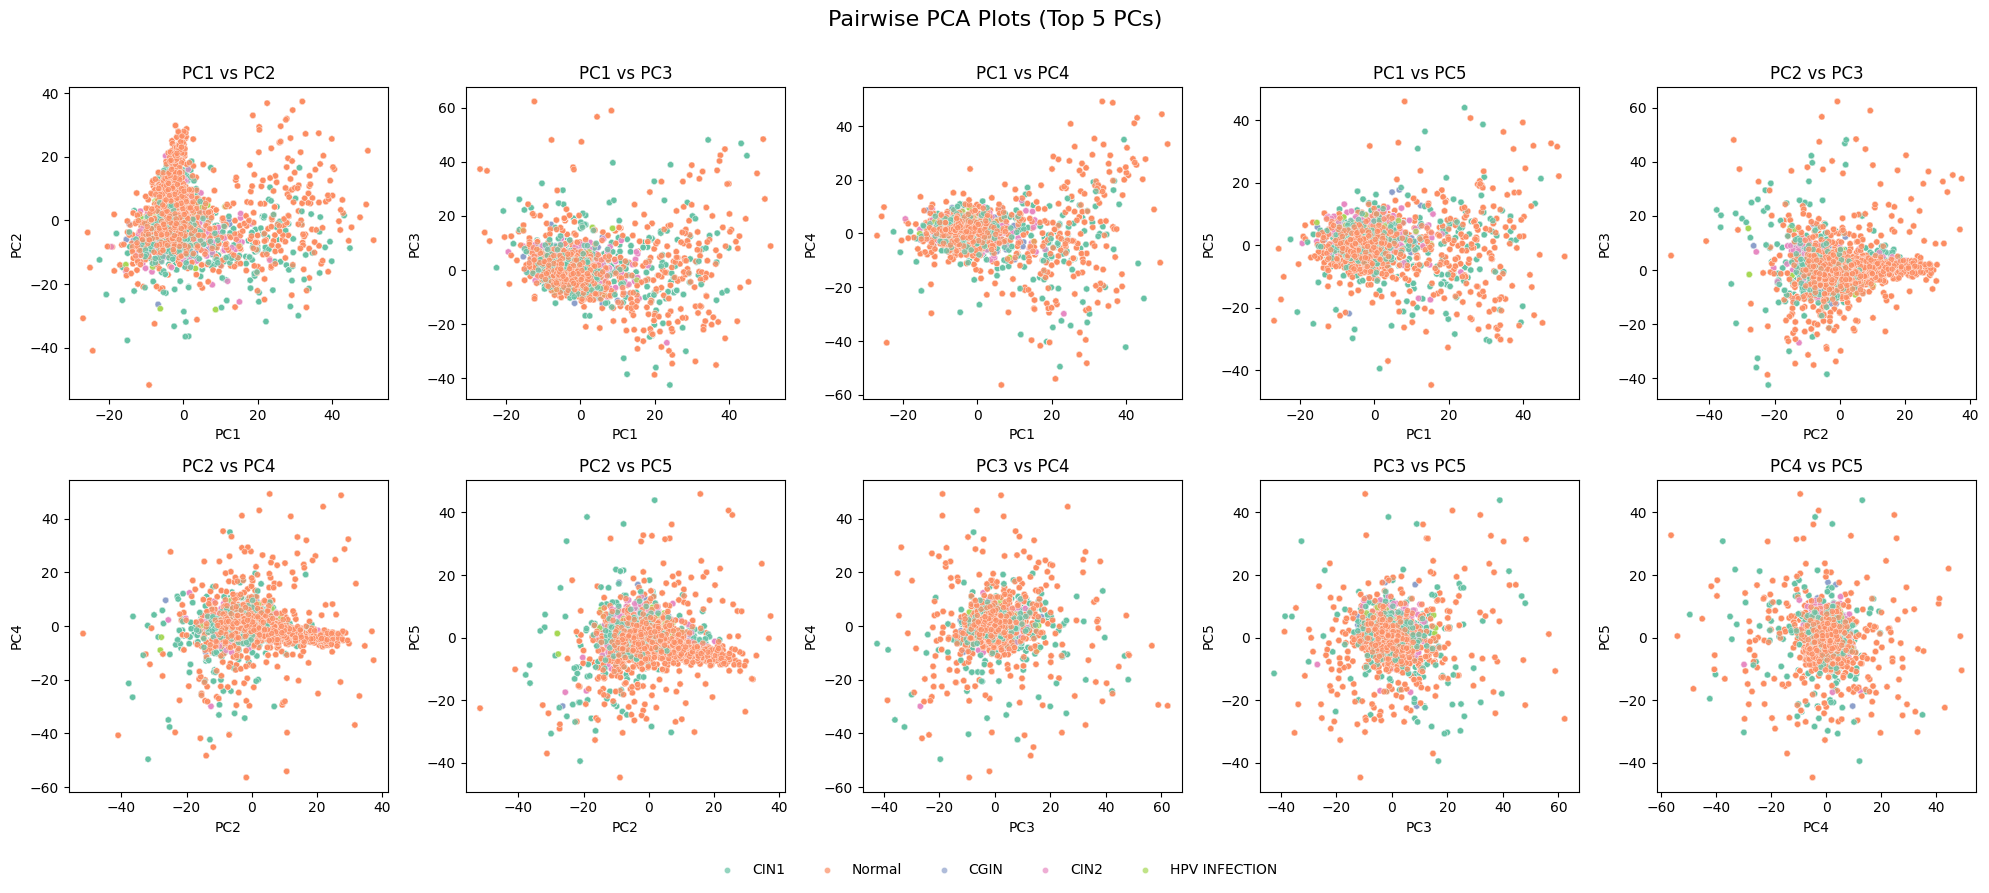

In [14]:
# Plot all 10 PC pair combinations
pc_pairs = list(combinations(range(5), 2))
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, (pc1, pc2) in enumerate(pc_pairs):
    sns.scatterplot(
        data=pca_df,
        x=f'PC{pc1+1}', y=f'PC{pc2+1}',
        hue='Label',
        ax=axes[i], palette='Set2', s=20, alpha=0.7
    )
    axes[i].set_title(f'PC{pc1+1} vs PC{pc2+1}')
    axes[i].legend().set_visible(False)  # Hide legends for cleanliness

# Add global legend, moved down with some spacing
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='lower center',
    ncol=len(labels),
    frameon=False,
    bbox_to_anchor=(0.5, -0.05)  # X=0.5 (center), Y below the plot area (-0.05)
)
plt.tight_layout()
plt.suptitle("Pairwise PCA Plots (Top 5 PCs)", fontsize=16, y=1.05)
plt.show()

In [15]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio per PC:", explained_variance_ratio)
print("Cumulative explained variance:", explained_variance_ratio.cumsum())

Explained variance ratio per PC: [0.0310225  0.02643805 0.01917851 0.01656789 0.01468822]
Cumulative explained variance: [0.0310225  0.05746054 0.07663905 0.09320694 0.10789516]


# Redo PCA to capture 95% variance in data

Should ideally be done after the data has been prepped for CV. Here, just a proof of concept.

In [16]:
# Standardise the feature data
X_scaled_final = StandardScaler().fit_transform(combined_copy_logmed[features])
#X_scaled = combined_copy_logmed[features]
pca95 = PCA(n_components=0.95)
X_pca95 = pca95.fit_transform(X_scaled_final)

In [17]:
explained_variance_ratio95 = pca95.explained_variance_ratio_
print("Explained variance ratio per PC:", len(explained_variance_ratio95))

Explained variance ratio per PC: 862


In [37]:
# Assuming `pca` is your fitted PCA model
# and `features` is the list of original feature names
loadings = pd.DataFrame(
    pca.components_.T,  # shape: (n_features, n_components)
    index = features,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Get top 10 contributing features per PC
top_features_per_pc = {}

for pc in loadings.columns:
    # Get top 10 features by absolute value, but return original signed values
    top_features = (
        loadings[pc]
        .loc[loadings[pc].abs().sort_values(ascending=False).index[:10]]
        .round(4)  # round signed values
    )
    top_features_per_pc[pc] = top_features

# Display top features for each PC
for pc, features_series in top_features_per_pc.items():
    print(f"\nTop 10 features for {pc}:")
    print(features_series)


Top 10 features for PC1:
173.848074658203    0.0454
119.24753449707     0.0450
118.744803173828    0.0448
118.648840649414    0.0448
118.885458691406    0.0447
119.023962719727    0.0444
160.432989819336    0.0444
119.426542980957    0.0444
118.546232922363    0.0442
128.0353           -0.0441
Name: PC1, dtype: float64

Top 10 features for PC2:
347.143637402344    0.0638
276.111777050781    0.0612
404.16567109375     0.0593
238.083349926758    0.0585
572.484213574219    0.0570
319.122580273438    0.0561
679.503744824219    0.0553
403.972189648438    0.0552
333.133383496094    0.0545
134.046820385742    0.0540
Name: PC2, dtype: float64

Top 10 features for PC3:
106.274359448242    0.0444
106.143477185059    0.0443
105.850348217773    0.0442
106.453909619141    0.0441
106.03799317627     0.0441
105.692366345215    0.0438
105.580786450195    0.0438
105.4776828125      0.0438
106.608244641113    0.0436
85.3614260986328    0.0435
Name: PC3, dtype: float64

Top 10 features for PC4:
873.7713

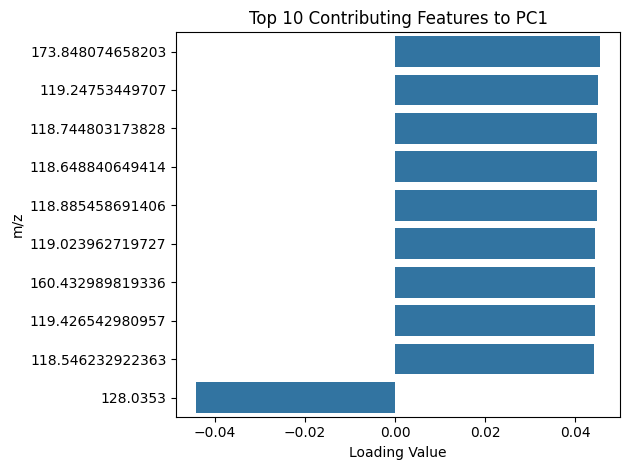

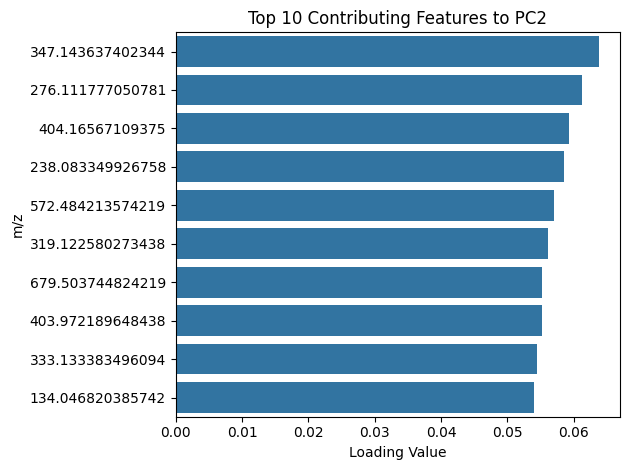

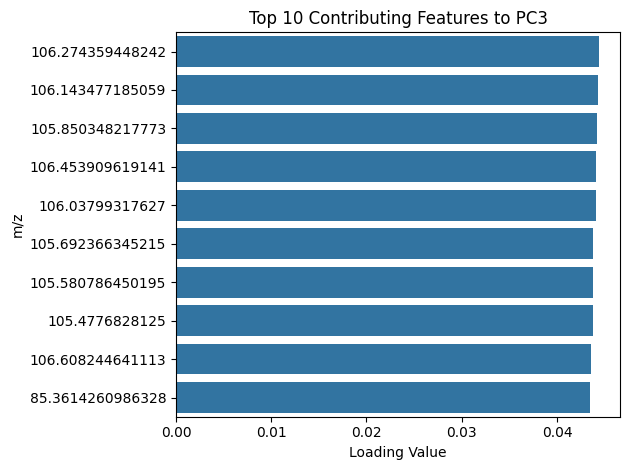

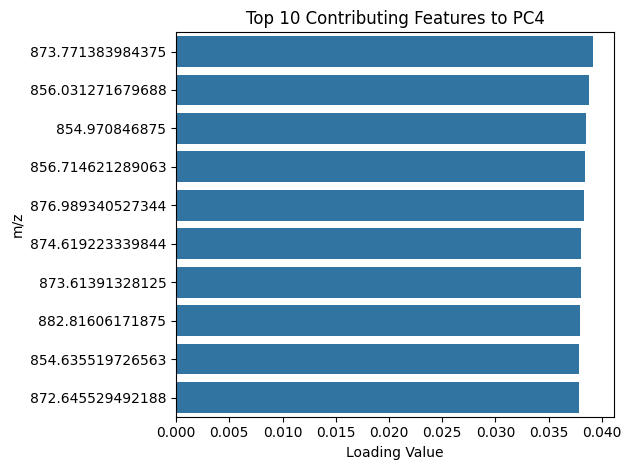

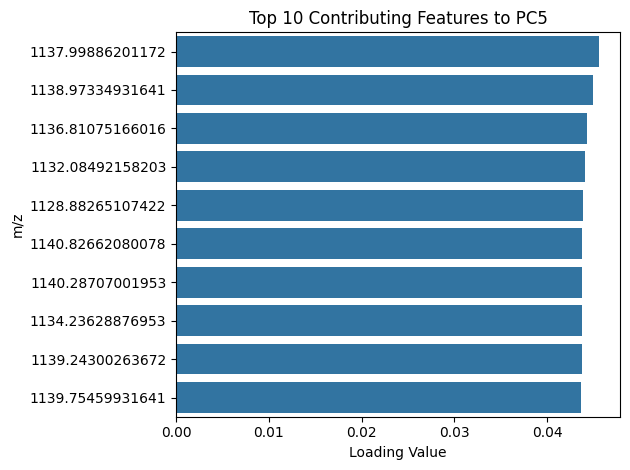

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the top features of PC1
for i in range(len(top_features_per_pc)):
    pc = f'PC{i+1}'
    sns.barplot(
        x=top_features_per_pc[pc].values,
        y=top_features_per_pc[pc].index,
    )
    plt.title(f"Top 10 Contributing Features to {pc}")
    plt.xlabel("Loading Value")
    plt.ylabel('m/z')
    plt.tight_layout()
    plt.show()